# Upgrade Proposal

Julia Marcinkowska  
[](https://orcid.org/0009-0007-3120-1816)

# Background

*Summary of current state of the field and context within which the research is located, covering current theory/state of the evidence and referring to relevant literature (500-1,000 words).*

The <span class="gls">NMDA</span> hypofunction hypothesis of schizophrenia proposes that decreased activity of <span class="gls">NMDA</span> receptors has a key role in the development of schizophrenia pathology. The affected <span class="gls">NMDA</span> receptors are primarily localised at <span class="gls">GABA</span>-ergic fast-spiking <span class="gls">PV</span> interneurons; where decreased activity of <span class="gls">PV</span> interneurons causes a disinhibition of their activity on pyramidal neurons, disrupting the <span class="gls">EI</span> balance, and leading to increased excitation. Hyperactivity in the hippocampus is observed in the early stages in schizophrenia, as well as in people at clinical high risk of schizophrenia that subsequently develop the disorders, suggesting this region might be implicated in the development of the pathology at early stages of the disorder. This is consistent with the observations that administation of <span class="gls">NMDA</span> antagonists like phencyclidine and ketamine induces behaviours comparable to all three schizoprenia symptom dimensions (positive, negative, and cognitive symptoms) (citations from \[@nakazawa_origin_2020\]), and repeated administration results in increased release of <span class="gls">DA</span> in rodent striatum citations from \[@nakazawa_origin_2020\], suggesting that hyperdopaminergia is caused by decreased <span class="gls">NMDA</span> activity \[@grace_dopamine_2012; @grace_dysregulation_2016\].

Alterations in synaptic function have also been implicated in the aetiology of schizophrenia \[@howes_synaptic_2023\]. Excitotoxicity caused by increased glutamatergic activity might be one of the contributing factors in the reduction in synaptic connections in schizophrenia.

Levetiracetam (LEV) is an anticonvulsant drug that selectively binds to SV2A, and works by normalising the excitation inhibition imbalance in epilepsy, although it is not clear whether its action is due to increase in the release of GABA or decrease in Glutamate. It was also found to be helpful in treating subclinical epileptiform discharges in autism spectrum disorder (ASD)\[@wang_levetiracetam_2017\]. Only one study tested the effects of LEV in schizophrenia; their findings suggesting that LEV can normalise hippocampal hyperactivity \[@roeske_modulation_2023\] where E/I imbalance is understood to originate.

In [ ]:
# Create a dataframe called df
Component <- c('N2','P3')
Latency <- c('150 to 200ms', '625 to 800ms')
Location <- c('FCz, Fz[@wang_levetiracetam_2017], Cz[@roeske_modulation_2023]', 'Pz, Oz')
df <- data.frame(Component, Latency, Location)
knitr::kable(df, booktabs = TRUE)

  ---------------------------------------------------------------------------
  Component   Latency    Location
  ----------- ---------- ----------------------------------------------------
  N2          150 to     FCz, Fz[@wang_levetiracetam_2017],
              200ms      Cz[@roeske_modulation_2023]

  P3          625 to     Pz, Oz
              800ms      
  ---------------------------------------------------------------------------


In [ ]:
Component <- c('N2','P3')
Latency <- c('150 to 200ms', '625 to 800ms')
Location <- c('FCz, Fz[@wang_levetiracetam_2017], Cz[@roeske_modulation_2023]', 'Pz, Oz')
df <- data.frame(Component, Latency, Location)
knitr::kable(df, "latex")

# Aims and objectives

-   The aim of my project is to examine the relationship between synaptic connectivity and glutamatergic function. To do this I will measure the difference in glutamate levels (MRS) after administration of LEV and placebo in healthy controls and people with schizophrenia.
-   The recruitment target is 50 participants: 25 healthy controls (HC) and 25 people with schizophrenia (SZ).

# Hypotheses under investigation

I will aim to answer the following questions:

1.  Does modulating SV2A lead to lower glutamate levels in healthy people?
2.  Does modulating SV2A lead to lower glutamate levels in people with schizophrenia? Is the change different to that in healthy controls?
3.  Does modulating SV2A lead to change in symptoms in schizophrenia?

# Methodology

## Study design and data collection

-   Single-blind, randomised, placebo-controlled trial with cross-over design.

## Analysis

-   MRS data processing with Osprey - Hippocampus and ACC SVS

## Statistics

-   Statistical analysis: ANOVA / t-test (within and between group). Power calculations.
-   I will compare the effect of levetiracetam on Glx levels in healthy controls (HC) and patients with schizophrenia (SZ). This will be visualised on a raincloud plot such as the one below. The data used in this graph is made up for the purpose of illustrating the types of comparisons and data visualisations I plan on using.

``` python
library(ggplot2)
library(ggrain)
library(wesanderson)

glx <- c(rnorm(25, mean=45, sd=10), rnorm(25, mean=45, sd=13), rnorm(25, mean=69, sd=10), rnorm(25, mean=45, sd=10))
group <- c(replicate(50, "HC"), replicate(50, "SZ"))
dosing <- c(replicate(25, "Placebo"), replicate(25, "Drug"), replicate(25, "Placebo"), replicate(25, "Drug"))
id <- c(replicate(2, 101:125), replicate(2, 201:225))

data <- data.frame(id, group, dosing, glx)
data$dosing <- factor(data$dosing, levels = c('Placebo', 'Drug'))
data$group <- factor(data$group, levels = c('HC', 'SZ'))

colour_map <- "Pastel1"
pal <- wes_palette("GrandBudapest1", n=2, type = "discrete")
# wes_palette("GrandBudapest1", type = "discrete", n=2)

# jpeg(file="files/rain_plot.jpeg", height = 5000, width = 4500, res=400)

rainplot <- ggplot(data[data$dosing %in% c('Placebo', 'Drug'),], aes(dosing, glx, fill = group, color=group)) +
    geom_rain(alpha = .5, rain.side = 'f2x2', id.long.var = "id",
            violin.args = list(color = "black", alpha = .7)) +
    stat_summary(fun = mean, geom = "line", aes(group = group, color = group), lwd=1.5) +
    # stat_summary(fun = mean, geom = "point", aes(group = group, color = group)) +
    labs(
        # title = "Comparison of GLX levels change between\nplacebo and levetiracetam in HC and SZ",
        x = "Dosing",
        y = "Concentration of Glx"
    ) +
    scale_x_discrete(labels = c('Placebo','Levetiracetam')) +
    theme_classic(base_size = 22) +
    theme(plot.title = element_text(hjust = 0.5), legend.position="bottom") +
    scale_fill_manual(values = pal) +
    scale_color_manual(values = pal) +
    guides(fill = guide_legend())
```

    Warning: Duplicated aesthetics after name standardisation: alphaWarning: Using the `size` aesthetic with geom_polygon was deprecated in ggplot2 3.4.0.
    ℹ Please use the `linewidth` aesthetic instead.

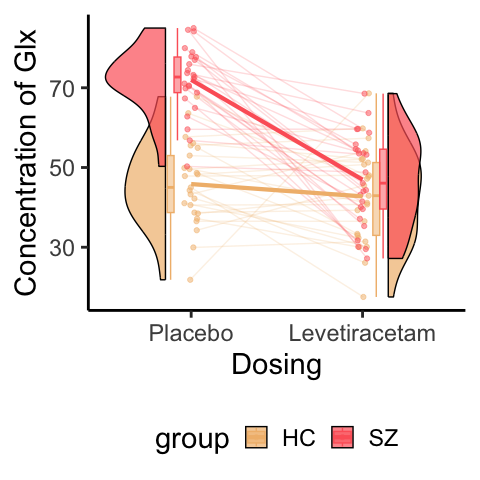

# Progress made to date, including pilot work, if applicable

# Planned future work

# Contribution to existing knowledge.

**How the research will form a distinct contribution to existing knowledge on the subject and afford evidence of originality shown by discovery of new facts or exercise of independent critical power**

# Personal share in investigations

**Where work is done in conjunction with the supervisor and/or with collaborators or other students, a statement of the candidate’s own personal share in the investigations**

# Timeline for the remainder of studies.

``` python
library(plan)

gt_object <- read.gantt("gantt.csv") 

plot(gt_object,
    # event.label='Report Date', event.time='2024-08-27',
    col.event=c("red"),
    col.done=c("lightblue"),
    col.notdone=c("pink"),
    main="Gantt Chart"
    )
legend("topright", pch=22, pt.cex=2, cex=0.9, pt.bg=c("lightblue", "pink"),
    border="black",
    bg="white", xpd=TRUE, legend=c("Completed", "Not Yet Done"))
```

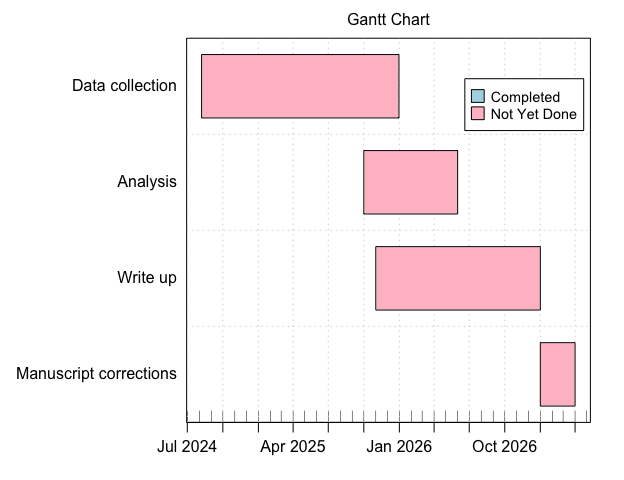



# References